In [43]:
import pandas as pd
import tqdm
import numpy as np
import json
from query import DGA_makerequest
from process import process_DGA_QTable, process_DGA_Pr24hTable, process_DGA_PrMaxTable

---
### Example 1: Download a single year for a single station

In [39]:
# Load .json file with cURL data
with open('DGA_cURL.json', 'r') as file:
    jsondata = json.load(file)
cookies = jsondata['cookies']
headers = jsondata['headers']
data    = jsondata['data']
ds_data = pd.Series(data)

In [40]:
url     = 'https://snia.mop.gob.cl/BNAConsultas/reportes'
outfile = 'tmp/RioAconcaguaEnRomeral_2011.xlsx'

# Edit request data with desired year
ndata = ds_data.copy()
ndata['filtroscirhform:fechaDesdeInputDate'] = f'01/01/2011'
ndata['filtroscirhform:fechaHastaInputDate'] = f'31/12/2011'
ndata = dict(ndata)

In [41]:
# Make request and check status
value = DGA_makerequest(outfile, url, cookies, headers, ndata)
print(value)

True


If the request was succesfull an excel spreadsheet should now exist on the output path

In [44]:
# Post process
sheet = pd.read_excel('tmp/RioAconcaguaEnRomeral_2011.xlsx')

# Since i downloaded runoff data i will use the runoff processing fuction
data, metadata = process_DGA_QTable(sheet)

In [45]:
# Check results
metadata

,05423003-6
Cuenca,RIO ACONCAGUA
SubCuenca,Rio Aconcagua Bajo (Entre despues E Seco y Des...
Nombre,RIO ACONCAGUA EN ROMERAL
x,310429
y,6364620
lon,71° 01' 32''
lat,32° 50' 24''
Altura,365


In [47]:
data

,q_m3s,h_m
2011-01-01 00:00:00,1.938600,1.74
2011-01-01 01:00:00,1.938600,1.74
2011-01-01 02:00:00,1.938600,1.74
2011-01-01 03:00:00,1.938600,1.74
2011-01-01 04:00:00,1.938600,1.74
...,...,...
2011-12-19 19:00:00,7.010001,1.86
2011-12-19 20:00:00,5.600002,1.83
2011-12-19 21:00:00,4.699997,1.81
2011-12-19 22:00:00,4.249999,1.80


<Axes: >

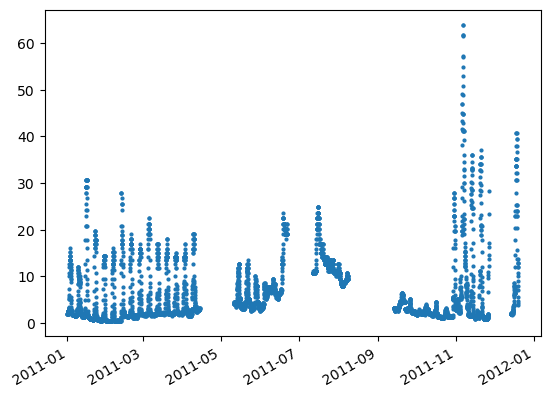

In [53]:
# Plot data as points
data['q_m3s'].plot(lw=0, marker='o', markersize=2)

---
#### Example 2: Download multiple years for a single station (runoff)

In [2]:
# Load .json file with cURL data
with open('DGA_cURL.json', 'r') as file:
    jsondata = json.load(file)
cookies = jsondata['cookies']
headers = jsondata['headers']
data    = jsondata['data']
ds_data = pd.Series(data)

In [38]:
# Download runoff from a specific station
url     = 'https://snia.mop.gob.cl/BNAConsultas/reportes'
years   = np.arange(2010, 2015+1,1) # Download from 2010 to 2015

# Loop over years
for k,yr in tqdm.tqdm(enumerate(years), total=len(years)):
    # Set output file
    outputfile = f'tmp/RioAconcaguaEnRomeral_{yr}.xlsx' # <- saved into my tmp directory
    
    # Copy json data and edit start and end keys
    ndata = ds_data.copy()
    ndata['filtroscirhform:fechaDesdeInputDate'] = f'01/01/{yr}'
    ndata['filtroscirhform:fechaHastaInputDate'] = f'31/12/{yr}'
    ndata = dict(ndata)
    value = DGA_makerequest(outputfile, url, cookies, headers, ndata)

100%|██████████| 6/6 [01:42<00:00, 17.06s/it]


In [21]:
# Postprocess runoff data

qgauges         = []
metadata_gauges = []
# Loop over years
for k,yr in tqdm.tqdm(enumerate(years), total=len(years)):
    spreadsheet = f'tmp/RioAconcaguaEnRomeral_{yr}.xlsx' 
    sheet           = pd.read_excel(spreadsheet)
    data, mdata  = process_DGA_QTable(sheet) 
    qgauges.append(data['q_m3s'])
    metadata_gauges.append(mdata)
    
# Concat data for each year into a single array
metadata_gauges = pd.concat(metadata_gauges, axis=1)
qgauges         = pd.concat(qgauges, axis=1)
qgauges.columns = metadata_gauges.columns
    
metadata_gauges

100%|██████████| 6/6 [00:01<00:00,  5.95it/s]


,05410005-1,05410005-1,05410005-1,05410005-1,05410005-1,05410005-1
Cuenca,RIO ACONCAGUA,RIO ACONCAGUA,RIO ACONCAGUA,RIO ACONCAGUA,RIO ACONCAGUA,RIO ACONCAGUA
SubCuenca,Rio Aconcagua Medio (Entre Rio Colorado y E Seco),Rio Aconcagua Medio (Entre Rio Colorado y E Seco),Rio Aconcagua Medio (Entre Rio Colorado y E Seco),Rio Aconcagua Medio (Entre Rio Colorado y E Seco),Rio Aconcagua Medio (Entre Rio Colorado y E Seco),Rio Aconcagua Medio (Entre Rio Colorado y E Seco)
Nombre,RIO ACONCAGUA EN SAN FELIPE,RIO ACONCAGUA EN SAN FELIPE,RIO ACONCAGUA EN SAN FELIPE,RIO ACONCAGUA EN SAN FELIPE,RIO ACONCAGUA EN SAN FELIPE,RIO ACONCAGUA EN SAN FELIPE
x,337335,337335,337335,337335,337335,337335
y,6374251,6374251,6374251,6374251,6374251,6374251
lon,70° 44' 11'',70° 44' 11'',70° 44' 11'',70° 44' 11'',70° 44' 11'',70° 44' 11''
lat,32° 45' 27'',32° 45' 27'',32° 45' 27'',32° 45' 27'',32° 45' 27'',32° 45' 27''
Altura,650,650,650,650,650,650


In [22]:
qgauges

,05410005-1,05410005-1,05410005-1,05410005-1,05410005-1,05410005-1
2010-11-02 00:19:00,0.8394,NaN,NaN,NaN,NaN,NaN
2010-11-02 01:19:00,0.8718,NaN,NaN,NaN,NaN,NaN
2010-11-02 02:19:00,0.8718,NaN,NaN,NaN,NaN,NaN
2010-11-02 03:19:00,0.9042,NaN,NaN,NaN,NaN,NaN
2010-11-02 04:19:00,0.9042,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2015-12-31 19:54:00,NaN,NaN,NaN,NaN,NaN,64.59430
2015-12-31 20:54:00,NaN,NaN,NaN,NaN,NaN,59.24808
2015-12-31 21:54:00,NaN,NaN,NaN,NaN,NaN,61.85488
2015-12-31 22:54:00,NaN,NaN,NaN,NaN,NaN,61.85488


---

#### Example 3: Download multiple stations for multiple years (only works for a single region)

On this example im downloading annual maximum precipitation for multiple stations in the 5th region. 
To loop over stations is import to know the webpage station id, which can be found in the cURL request (json file) like follows:


```text
    "data": {
        "filtroscirhform": "filtroscirhform",
        "filtroscirhform:regionFieldSetId-value": "true",
        "filtroscirhform:j_idt30-value": "filtroscirhform:j_idt45",
        "filtroscirhform:j_idt59": "on",
        "filtroscirhform:panelFiltroEstaciones-value": "true",
        "filtroscirhform:region": "5",  <------------------------ USER SELECTED REGION IN THE WEBPAGE (NOT LOOPABLE)
        "filtroscirhform:selectBusqForEstacion": "1",
        "filtroscirhform:cuenca": "-1",
        "filtroscirhform:estacion": "",
        "g-recaptcha-response": "",
        "filtroscirhform:j_idt100-value": "true",
        "filtroscirhform:j_idt181": "on",           <------------------------ STATION ID (LOOPABLE)
        "filtroscirhform:j_idt102-value": "true",
        "filtroscirhform:fechaDesdeInputDate": "01/01/1990",     <------------------------ START DATE (LOOPABLE)
        "filtroscirhform:fechaDesdeInputCurrentDate": "01/2011", 
        "filtroscirhform:fechaHastaInputDate": "31/12/2010",
        "filtroscirhform:fechaHastaInputCurrentDate": "12/2011",     <------------------------ END DATE (LOOPABLE)
        "filtroscirhform:generarxls": "Generar XLS",
        "javax.faces.ViewState": "-1017629065942579622:-7489475727910640494"
    }
}
```



In [56]:
# Load .json file with cURL data
with open('DGA_cURL.json', 'r') as file:
    jsondata = json.load(file)
cookies = jsondata['cookies']
headers = jsondata['headers']
data    = jsondata['data']
ds_data = pd.Series(data)

# Change the ID key name for future looping
ds_data = ds_data.rename({'filtroscirhform:j_idt181':'XXX'}) # <--- Change idt181 for the id of the station you downloaded.

In [116]:
url     = 'https://snia.mop.gob.cl/BNAConsultas/reportes'
ids     = np.arange(181,191+5,5)      # webpage ids follow the succession id_n = id_{n-1}+5
# Loop over years
for j,sid in tqdm.tqdm(enumerate(ids), total=len(ids)):
    ofile = f'tmp/PMax_idt{sid}.xls'
    
    ndata = ds_data.copy()
    ndata = ndata.rename({'XXX':f'filtroscirhform:j_idt{sid}'})          # Edit ID key
    ndata['filtroscirhform:fechaDesdeInputDate'] = f'01/01/1990'         # Edit starting year
    ndata['filtroscirhform:fechaHastaInputDate'] = f'31/12/{1990+39}'    # Edit ending year
    ndata = dict(ndata)
    value = DGA_makerequest(ofile, url, cookies, headers, ndata)    # Request

100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


In [117]:
# Postprocess

pgauge = []
pmeta  = []
for j,sid in tqdm.tqdm(enumerate(ids), total=len(ids)):
    ofile = f'tmp/PMax_idt{sid}.xls'
    try:
        sheet = pd.read_excel(ofile)
        data, mdata = process_DGA_PrMaxTable(sheet)
        pgauge.append(data)
        pmeta.append(mdata)
    except:
        pass
pgauge = pd.concat(pgauge, axis=0).drop_duplicates()
pmeta  = pd.concat(pmeta, axis=1).T.drop_duplicates().T

100%|██████████| 3/3 [00:00<00:00, 90.79it/s]


<Axes: >

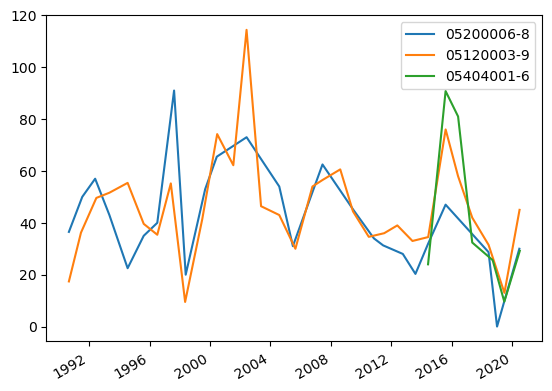

In [125]:
# Check
pgauge.plot()